## Description

In the first notebook, we took a brief look at the titanic dataset. The next step is to make some exploratory graphs, and then some decisions about how we will "clean" our data. 

The goal of "cleaning" data is to transform our dataset into a form on which we can easily test our hypotheses and run our machine learning algorithms. We will need to remove and/or replace null values with other values. The process of data cleaning does itself involve some decisions on what we see as important. 

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### Dropping columns from the dataframe

From the previous notebook, we saw that Age and Cabin had a large number of missing values. In the training set, 687 out of 891 rows were missing data in their "Cabin" column. Likewise, 327 out of 418 rows in the test data set are missing values for the Cabin column. With such a large percentage of missing values, we decide to remove the column Cabin from consideration.

Also, it seems like the Ticket Number, which probably serves more like a simple ID number, does not provide us with a good metric for distinguishing whether passengers survived or not, so we will drop this column from our dataframe.

In the following lines of code, we thus drop the Cabin and Ticket columns from both the training and test sets. The parameter "1" indicates that we are dropping a column, and the "inplace=True" means that we can keep using the same dataframe. In the final line, we ran our check for null values to make sure our drop worked.

In [2]:
train_df.drop('Cabin', 1, inplace=True)
test_df.drop('Cabin', 1, inplace=True)
train_df.drop('Ticket', 1, inplace=True)
test_df.drop('Ticket', 1, inplace=True)
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Next, we need to decide what to do about the many missing values in the Age column. We can use the describe() command to get an idea of the mean age of passengers, and then create a histogram to see the distribution of ages.

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


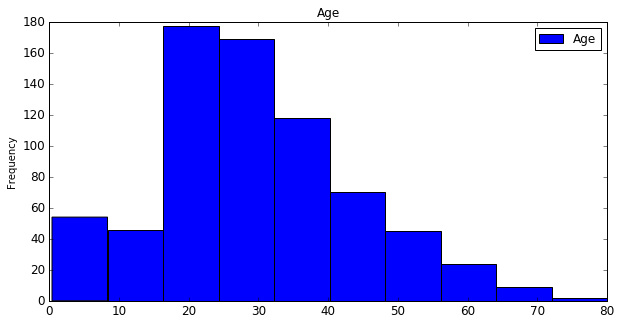

In [4]:
age_plot=train_df['Age'].plot(kind='hist',title='Age',figsize=(10,5),legend=True,fontsize=12)

We decide to replace the missing age values with the median age of the column. We then check whether our command works by checking for null values. Then, we make another histogram of Ages and see the histogram has been filled with more entries corresponding to the median value.

In [5]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

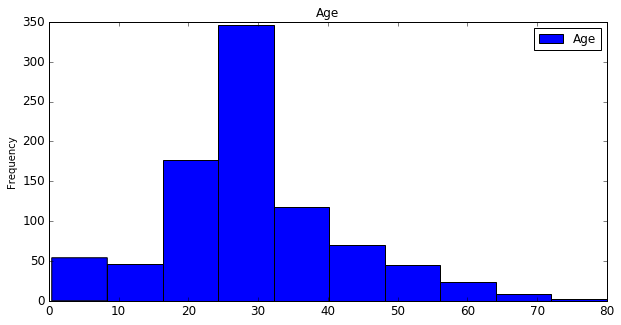

In [6]:
age_plot=train_df['Age'].plot(kind='hist',title='Age',figsize=(10,5),legend=True,fontsize=12)

We do the same operation on the test set - replace the null values with the median age.

In [7]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

We still note that there are a few missing values - "Embarked" in the training set, and "Fare" in the test set. Let's also replace the null fare value in the test set with the median value.

In [8]:
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

The "Embarked" value is a categorical value. Let's get a few more details on the categorical variables by using the option 'O' - this is the letter 0, not the number zero.

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Bateman, Rev. Robert James",male,S
freq,1,577,644


There are 3 values for Embarked - let's examine them.

In [10]:
pd.crosstab(index=train_df["Embarked"],columns="count")

col_0,count
Embarked,
C,168
Q,77
S,644


We see that there are three ports of embarkation; let's fill the NaN value of Embarked with the port that was mostly frequently used, here S.

In [13]:
train_df['Embarked'].fillna("S",inplace=True)

In [14]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

We have taken care of all of the missing values in columns. Let's check to make sure everything went well.

In [15]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [16]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


To summarize, we have deleted two columns, which we did not think had any relation to the variable of interest, i.e., survival. Also, we have checked for missing values and filled in any missing values.